<a href="https://colab.research.google.com/github/kenanmorani/Machine_Learning_idu/blob/main/s_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification on CIFAR-100 dataset 
# Machine Learning Course Final Project 
Izmir Democracy University, Electrical and Electronics Program  
Submitted to Assoc. Prof. Devrim Unay    
Submitted by Kenan MORANI     
Deadline for submission is on 3rd of February 2021


In [1]:
# Installing the required libraries
!pip uninstall keras
!pip install keras

Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3


In [2]:
# Importing the required libraries
from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.callbacks import Callback, LearningRateScheduler, TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras import backend as K
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Defining the required constants
BATCH_SIZE = 100
NUM_CLASSES = 100
EPOCHS = 50
INIT_DROPOUT_RATE = 0.5
MOMENTUM_RATE = 0.9
INIT_LEARNING_RATE = 0.01
L2_DECAY_RATE = 0.0005
CROP_SIZE = 32
LOG_DIR = './logs'
MODEL_PATH = './keras_cifar100_model.h5'

In [5]:
# Loading the data (CIFAR-100)
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [6]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


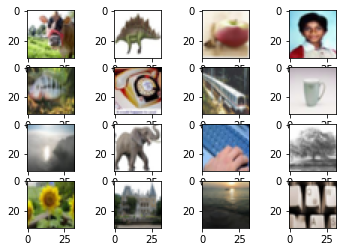

In [7]:
# Exploring the some images in the dataset
m=4
k=0
plt.figure(1)
for i in range(0,m):
  for j in range(0,m):
    plt.subplot2grid((m,m),(i,j))
    plt.imshow(x_train[k])
    k=k+1
plt.show()


In [8]:
# Modifying the type of datasets
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print(y_train.shape,y_test.shape)

(50000, 100) (10000, 100)


In [9]:
# Scaling and Normalizing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [10]:
# Building the model
model = Sequential()
model.add(ZeroPadding2D(4, input_shape=x_train.shape[1:]))
# Stack 1:
model.add(Conv2D(384, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 2:
model.add(Conv2D(384, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(384, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 3:
model.add(Conv2D(640, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 4:
model.add(Conv2D(768, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 5:
model.add(Conv2D(896, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 6:
model.add(Conv2D(1024, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1152, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 7:
model.add(Conv2D(1152, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
model.add(Flatten())
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 40, 40, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 40, 40, 384)       10752     
_________________________________________________________________
activation (Activation)      (None, 40, 40, 384)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 384)       0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 384)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 384)       147840    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 384)       5

In [ ]:
# Building the learning rate changes function
# def lr_scheduler(epoch, lr, step_decay = 0.1):
    #return float(lr * step_decay) if epoch == 34.000 else lr

In [ ]:
#class StepLearningRateSchedulerAt(LearningRateScheduler):
    #def __init__(self, schedule, verbose = 0): 
        #super(LearningRateScheduler, self).__init__()
        #self.schedule = schedule
        #self.verbose = verbose
    
    #def on_epoch_begin(self, epoch, logs=None): 
        #if not hasattr(self.model.optimizer, 'lr'):
            #raise ValueError('Optimizer must have a "lr" attribute.')
            
       # lr = float(K.get_value(self.model.optimizer.lr))
       # lr = self.schedule(epoch, lr)
       
      #  if not isinstance(lr, (float, np.float32, np.float64)):
          #  raise ValueError('The output of the "schedule" function ' 'should be float.')
        
       # K.set_value(self.model.optimizer.lr, lr)
        #if self.verbose > 0: 
            #print('\nEpoch %05d: LearningRateScheduler reducing learning ' 'rate to %s.' % (epoch + 1, lr))

In [12]:
def random_crop(img, random_crop_size):
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

In [13]:
def crop_generator(batches, crop_length, num_channel = 3):
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, num_channel))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

In [14]:
# Setting the optimizer
opt = SGD(lr=INIT_LEARNING_RATE, momentum=MOMENTUM_RATE)

In [15]:
# Defining the functions
# lr_rate_scheduler = StepLearningRateSchedulerAt(lr_scheduler)
tensorboard = TensorBoard(log_dir=LOG_DIR, batch_size=BATCH_SIZE)
checkpointer = ModelCheckpoint(MODEL_PATH, monitor='val_loss', verbose=1, save_best_only=True)

In [16]:
# Compiling the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy', 'top_k_categorical_accuracy'])

In [17]:
# Data augmentation 
datagen = ImageDataGenerator(samplewise_center=True,
                             zca_whitening=True,
                             horizontal_flip=True
                            )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [18]:
# Fitting data augmentation
datagen.fit(x_train)

In [19]:
# Building the datasets after augmentation 
train_flow = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)
train_flow_w_crops = crop_generator(train_flow, CROP_SIZE)
valid_flow = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [20]:
# Fitting the model
h=model.fit_generator(train_flow_w_crops,
                    epochs=50,
                    steps_per_epoch=len(x_train) / BATCH_SIZE,
                    callbacks=[tensorboard, checkpointer], #,lr_rate_scheduler was removed
                    validation_data=valid_flow, 
                    validation_steps=(len(x_train) / BATCH_SIZE))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
500/500 [==============================] - 375s 723ms/step - loss: 11.1515 - accuracy: 0.0137 - top_k_categorical_accuracy: 0.0697 - val_loss: 10.5165 - val_accuracy: 0.0263 - val_top_k_categorical_accuracy: 0.1231

Epoch 00001: val_loss improved from inf to 10.51654, saving model to ./keras_cifar100_model.h5
Epoch 2/50
500/500 [==============================] - 357s 714ms/step - loss: 10.2355 - accuracy: 0.0383 - top_k_categorical_accuracy: 0.1582 - val_loss: 9.3088 - val_accuracy: 0.1079 - val_top_k_categorical_accuracy: 0.3369

Epoch 00002: val_loss improved from 10.51654 to 9.30876, saving model to ./keras_cifar100_model.h5
Epoch 3/50
500/500 [==============================] - 358s 716ms/step - loss: 9.2823 - accuracy: 0.0883 - top_k_categorical_accuracy: 0.2970 - val_loss: 8.6571 - val_accuracy: 0.1355 - val_top_k_categorical_accuracy: 0.3710

Epoch 00003: val_loss improved from 9.30876 to 8.65714, saving model to ./keras_cifar100_model.h5
Epoch 4/50
500/500 [==========

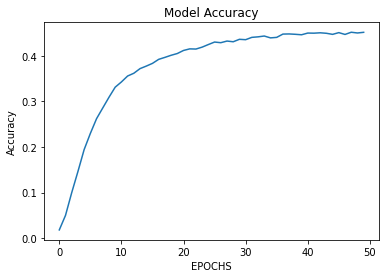

In [21]:

# Checking model's accuracy during training 
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.show()

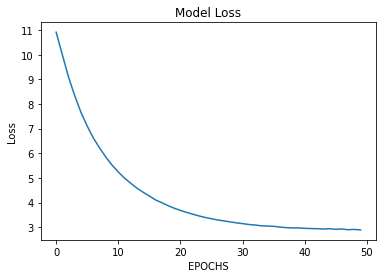

In [22]:
# Checking model's loss during training 
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.show()

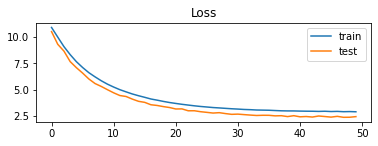

In [24]:
# Plotting loss on training and test sets
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(h.history['loss'], label='train')
pyplot.plot(h.history['val_loss'], label='test')
pyplot.legend()

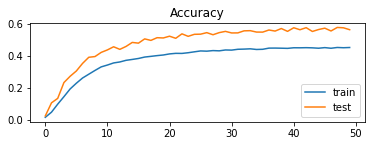

In [25]:
# plotting accuracy on training and test sets
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(h.history['accuracy'], label='train')
pyplot.plot(h.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [26]:
# evaluating the model
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

313/313 [==============================] - 22s 70ms/step - loss: 7.1929 - accuracy: 0.0423 - top_k_categorical_accuracy: 0.1408


In [27]:
# Making prediction using the model
predictions = model.predict(x_test, batch_size=100, verbose=1)

100/100 [==============================] - 15s 147ms/step


In [28]:
# Return Label function
def return_label(one_hot_lab):
    op = np.zeros(len(one_hot_lab))
    for i in range(len(one_hot_lab)):
        op[i] = np.argmax(one_hot_lab[i])
    return op
pred_labels = return_label(predictions)

# Generate Confusion Matrix
def prep_confusion_matrix(y_test, y_pred, num_of_classes=100):
    op = np.zeros((num_of_classes, num_of_classes))
    for i in range(len(y_test)):
        op[int(y_test[i]),int(y_pred[i])] += 1
    return op
# De-one-hotting labels
y_tst_dh = return_label(y_test)
# Preparing the confusion Matrix
conf_mat = prep_confusion_matrix(y_tst_dh, pred_labels)

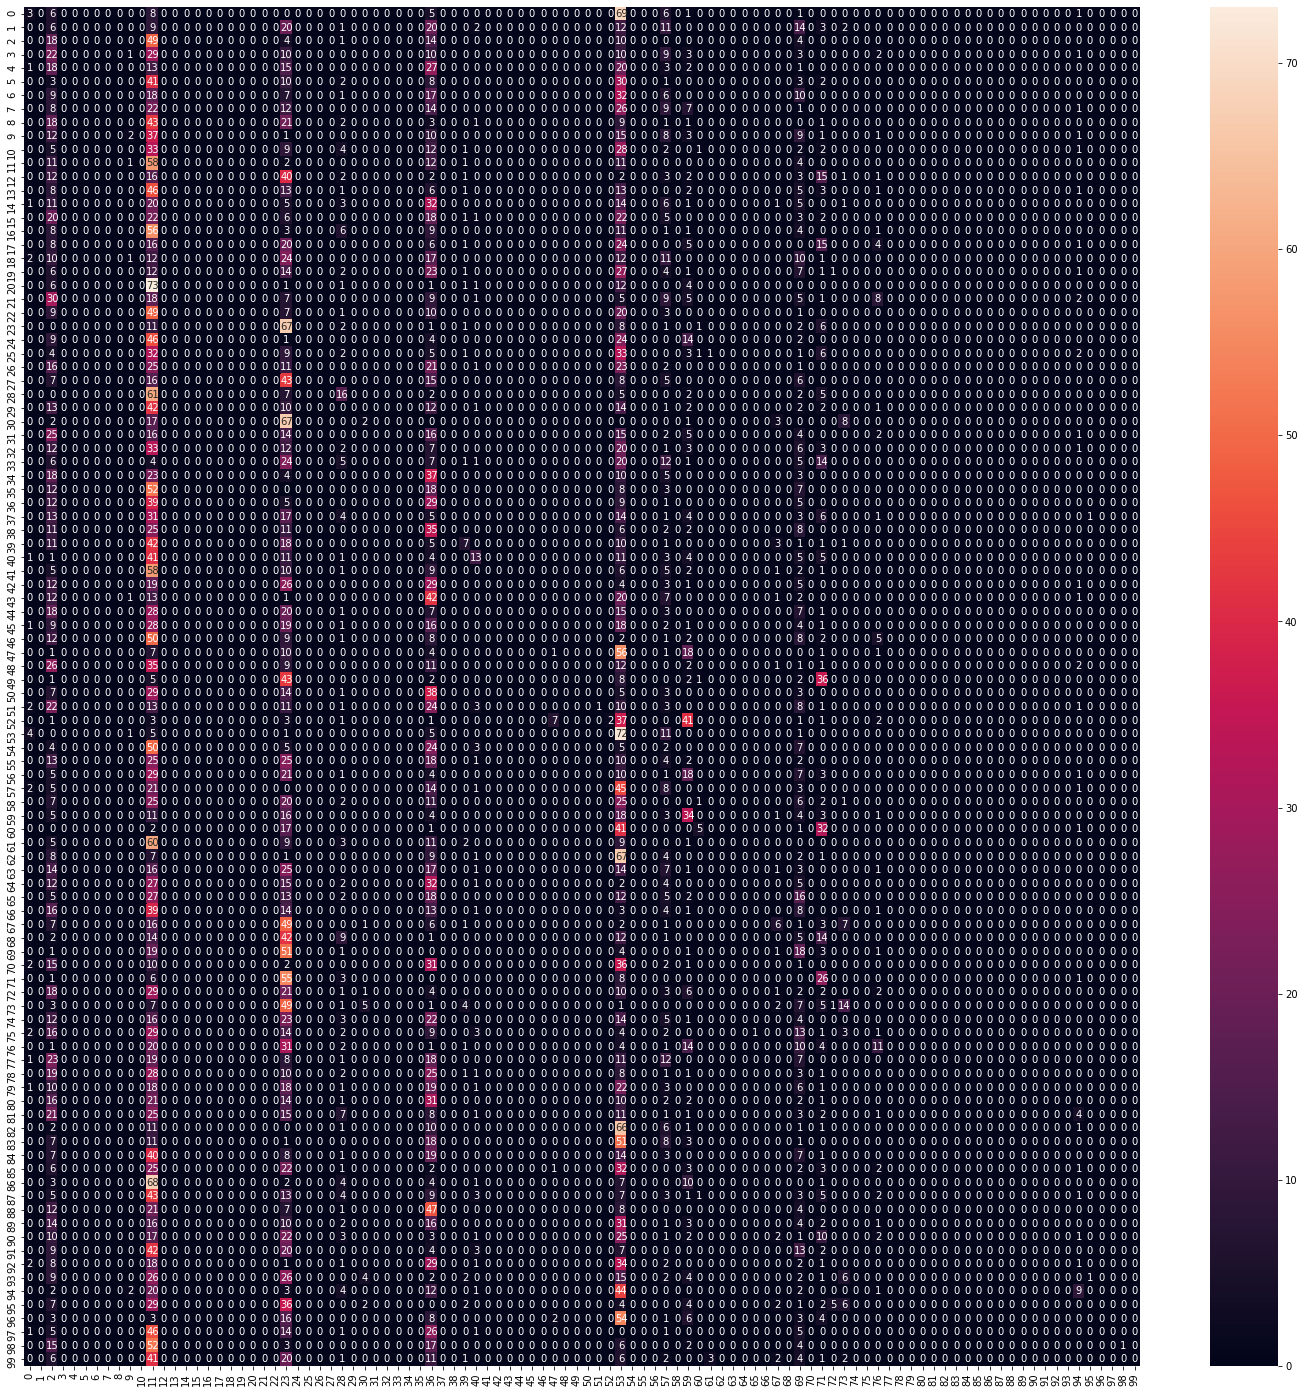

In [29]:
import pandas as pd
import seaborn as sn
# Plotting the Confusion Matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(100)],
                  columns = [i for i in range(100)])
plt.figure(figsize = (25,25))
sn.heatmap(df_cm, annot=True)